# Decision tree

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("../Data/Hitters.csv")
df


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

<Axes: xlabel='Years', ylabel='Hits'>

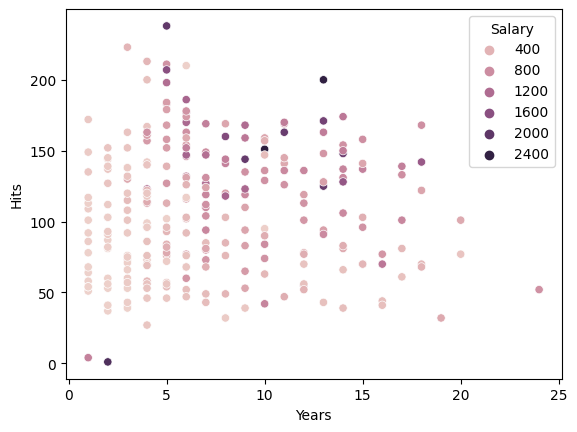

In [7]:
sns.scatterplot(data = df, x="Years", y="Hits", hue="Salary")

## more EDA - left for reader ...

---
## Decision tree for regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model = DecisionTreeRegressor(max_depth=3)

# for pedagogical reasons - pick same as in theory
X, y = df[["Years", "Hits"]], df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((210, 2), (53, 2), (210,), (53,))

In [27]:
model.fit(X_train, y_train)
model.feature_importances_

array([0.59097087, 0.40902913])

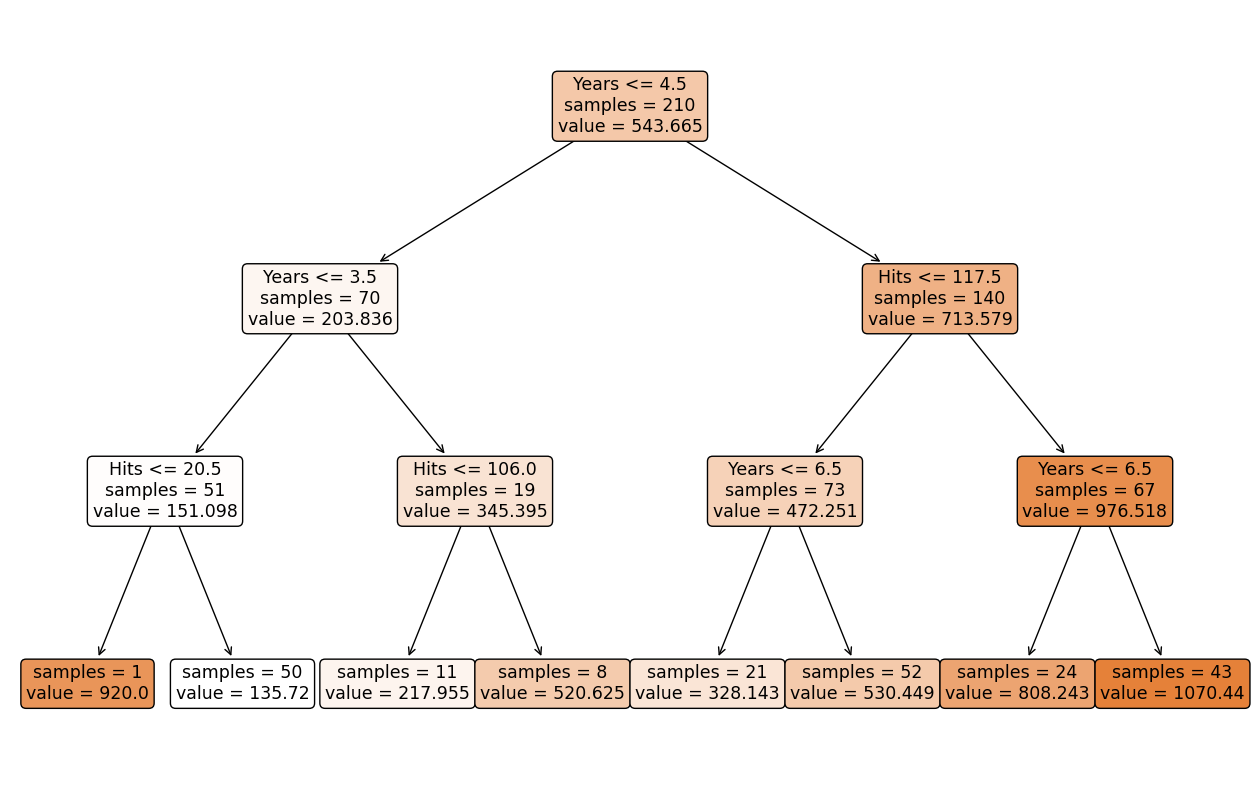

In [29]:
from sklearn import tree

fig = plt.figure(figsize=(16, 10))
tree.plot_tree(model, filled=True, feature_names=X_train.columns, impurity=False, rounded=True);


In [35]:
print(tree.export_text(model, feature_names=list(X_train.columns)))
#TODO: for the reader to parse this text and extract predictors and their respective threshold

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- Hits <= 20.50
|   |   |   |--- value: [920.00]
|   |   |--- Hits >  20.50
|   |   |   |--- value: [135.72]
|   |--- Years >  3.50
|   |   |--- Hits <= 106.00
|   |   |   |--- value: [217.95]
|   |   |--- Hits >  106.00
|   |   |   |--- value: [520.62]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- Years <= 6.50
|   |   |   |--- value: [328.14]
|   |   |--- Years >  6.50
|   |   |   |--- value: [530.45]
|   |--- Hits >  117.50
|   |   |--- Years <= 6.50
|   |   |   |--- value: [808.24]
|   |   |--- Years >  6.50
|   |   |   |--- value: [1070.44]



### Evaluate om test data

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

MAE, MSE, RMSE = mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

MAE, MSE, RMSE


(240.73162389212368, 116306.88265000835, 341.03794898809775)

In [39]:
percentage_RMSE = RMSE/np.mean(y_test)
percentage_RMSE

0.674971227249999

## Decision tree for classification

In [45]:
df = pd.read_csv("../Data/Default.csv")
df = pd.get_dummies(df, drop_first=True)
df.head()


,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [46]:
X, y = df.drop("default_Yes", axis="columns"), df["default_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((8000, 3), (2000, 3), (8000,), (2000,))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.33      0.32      0.33        69

    accuracy                           0.95      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.95      0.95      0.95      2000



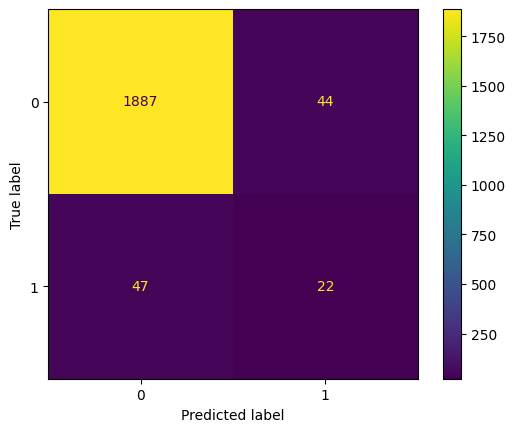

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# note - decision tree in sklearn can't handle categorical variables directly, must dummy encode
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


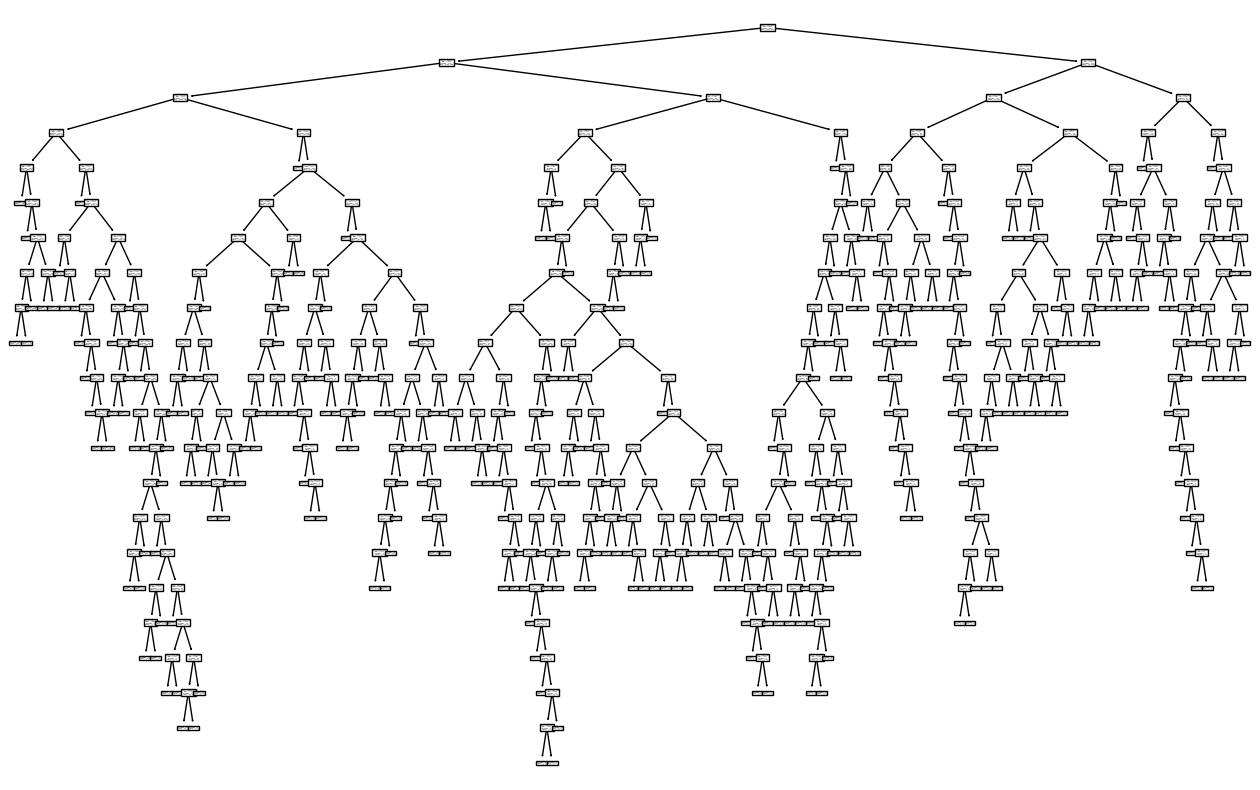

In [52]:
fig = plt.figure(figsize=(16, 10))
tree.plot_tree(clf);